In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
dfMain = pd.read_csv("../data/raw/raw_MC.csv")
display(dfMain)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
dfMain.shape
# May dataset has 1338 columns and 7 rows 

(1338, 7)

In [ ]:
dfMain.head()
# The output below shows the first 5 rows of my dataset. I can see some example values of each variable listed in the columns. 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dfMain.columns
# The columns in my dataset are: 'age', 'sex', 'bmi', 'children', 'smoker', 'region', and 'charges'. 
# These are the variable that were collected and can be studied. 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
dfMain.info()
# This function shows that there is no null values in our dataset 
# The type of data for each variable is also stated below. 
#  - age and children are integers. 
#  - sex, smoker, and region are objects.
#  - bmi and charges are floating point numbers. 
# I will be changing 'children', 'sex', 'smoker', and 'region' variables to categories because they are categorical data. 
# 'age', 'bmi', and 'charges' are all numerical and continuous data, but I will keep age as an integer and the rest as floating point numbers. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


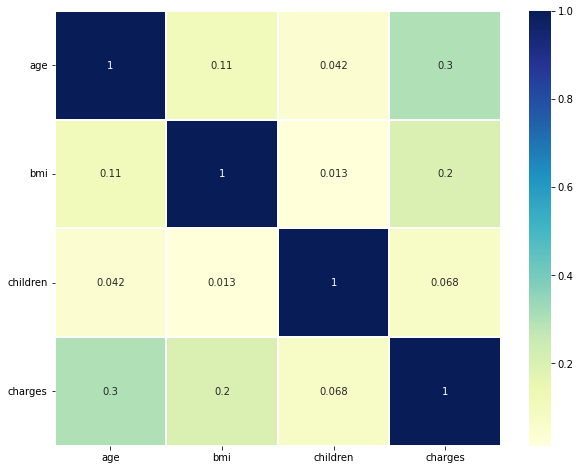

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(dfMain.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# I am graphing a correlation matrix to gain general understanding of all of my numeric variables. 
# All of the variables have a correlation in the positive direction. 

In [ ]:
# set categorical data
dfMain['sex'] = dfMain['sex'].astype('category')
dfMain['children'] = dfMain['children'].astype('category')
dfMain['smoker'] = dfMain['smoker'].astype('category')
dfMain['region'] = dfMain['region'].astype('category')
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.4 KB


In [ ]:
dfMain.nunique(axis=0)
# These are the unique values of each variable. 
# The oldest age is 47 years old.
# There are two types of sex; male and female 
# There are six different categories of children ranging from 0 to 6 children 
# There are two types of answers for smokers; yes and no
# There are 4 different regions; northeast, northwest, southeast, southwest
# There are 1337 different types of charges (this does not tell us much because it just means that none of the charges match).

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
# generate preview of entries with null values
if dfMain.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(dfMain[dfMain.isnull().any(axis=1)])
    missingno.matrix(dfMain)
    plt.show()
else: 
    print("No null values in this dataset")
    
# There are no null values in this dataset

No null values in this dataset


In [ ]:
# generate count statistics of duplicate entries
if len(dfMain[dfMain.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(dfMain[dfMain.duplicated()]))
    print(dfMain[dfMain.duplicated(keep=False)].sort_values(by=list(dfMain.columns)))
else:
    print("No duplicated entries found")

# There is oen set of duplicate entries in row 195 and row 581. 
#      age   sex    bmi children smoker     region    charges
# 195   19  male  30.59        0     no  northwest  1639.5631
# 581   19  male  30.59        0     no  northwest  1639.5631

No. of duplicated entries:  1
     age   sex    bmi children smoker     region    charges
195   19  male  30.59        0     no  northwest  1639.5631
581   19  male  30.59        0     no  northwest  1639.5631


In [ ]:
dfMain.drop_duplicates(inplace=True)

if len(dfMain[dfMain.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(dfMain[dfMain.duplicated()]))
    print(dfMain[dfMain.duplicated(keep=False)].sort_values(by=list(dfMain.columns)))
else:
    print("No duplicated entries found")

# Now there are no more duplicate entries. 

No duplicated entries found


In [ ]:
dfMain.shape
# Because of that one row of duplicate values being dropped, the new total number of rows are 1337. 

(1337, 7)

In [ ]:
# Next, I will round all of my float point values to 2 decimal places for simplicity. 
dfMain['bmi'] = dfMain['bmi'].round(decimals = 2)
dfMain['charges'] = dfMain['charges'].round(decimals = 2)
dfMain.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [ ]:
dfMain.describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663628,13279.121503
std,14.044333,6.100233,12110.359677
min,18.000000,15.960000,1121.870000
25%,27.000000,26.290000,4746.340000
50%,39.000000,30.400000,9386.160000
75%,51.000000,34.700000,16657.720000
max,64.000000,53.130000,63770.430000


<seaborn.axisgrid.PairGrid>

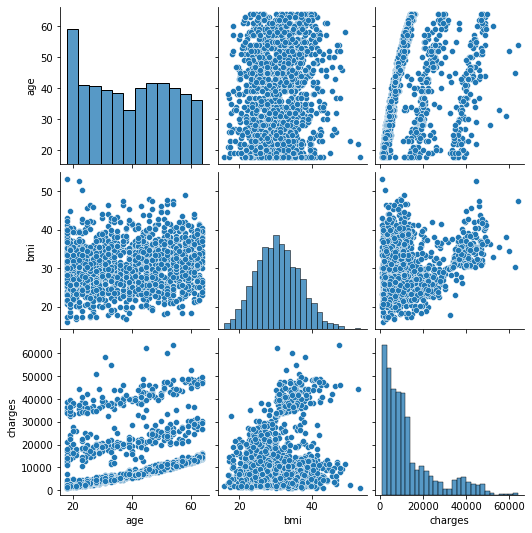

In [ ]:
#create a boxplot for every column in df
#pair plots
sns.pairplot(dfMain)

<AxesSubplot:ylabel='Frequency'>

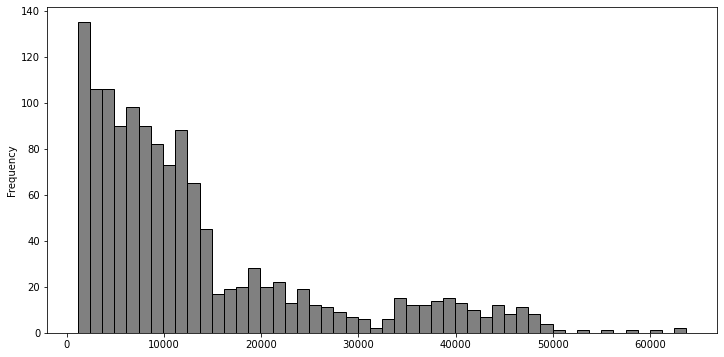

In [ ]:
dfMain['charges'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')
# This is a positively skewed data. It shows that a larger number of people are charged on the lower end of the price range shown in our dataset

<AxesSubplot:xlabel='age', ylabel='charges'>

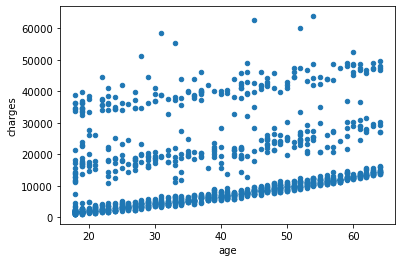

In [ ]:
# I am interested in visualizing the relationship between age and charges. I can do a scatterplot to try to see the trend.
# dfMain.plot(kind = 'scatter', x = 'age', y = 'charges')

In [ ]:
# According to my research questions, I will be looking at smokers, number of children, and total charges. 
# Therefore, I will be removing the columns 'age', 'sex', 'bmi', and region'. 
#dfMain = dfMain.drop(['age', 'sex', 'bmi', 'region'], axis = 1)
#dfMain.head()

In [ ]:
#newName = {"...": "...", "...": "...", "...": "..."}

# call rename () method
#dfMain.rename(columns = newName, inplace = True)
#dfMain.head()